# Машинное обучение, ВМК МГУ

# Практическое задание 3

### Общая информация

Дата выдачи: 20 ноября 2019

Мягкий дедлайн: 23:59MSK 3 декабря 2019 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 10 декабря 2019.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: homework-practice-04-Username.ipynb, где Username — ваша фамилия и имя на латинице именно в таком порядке (например, homework-practice-04-IvanovIvan.ipynb).

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка:** ...

In [3]:
%pylab inline
import pandas as pd

from sklearn.datasets import load_diabetes, make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

В этой части мы кратко познакомимся с линейной регрессией.

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3.

In [4]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


__Задание 1.__ Обучение линейной регрессии.

**(1 балл)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [5]:
from sklearn import linear_model


In [6]:
w_l2 = []
w_l1 = []
num = 30
eps = 1e-3

for c in  numpy.logspace(-3, 3, num = num):
    model = linear_model.Lasso(c, max_iter = 20000)
    model.fit(X_train, y_train)
    coef = model.coef_
    w_l1.append (np.sum(np.abs(coef) > eps))
    
    model = linear_model.Ridge(c, max_iter = 20000)
    model.fit(X_train, y_train)
    coef = model.coef_
    w_l2.append(np.sum(np.abs(coef) > eps))
    

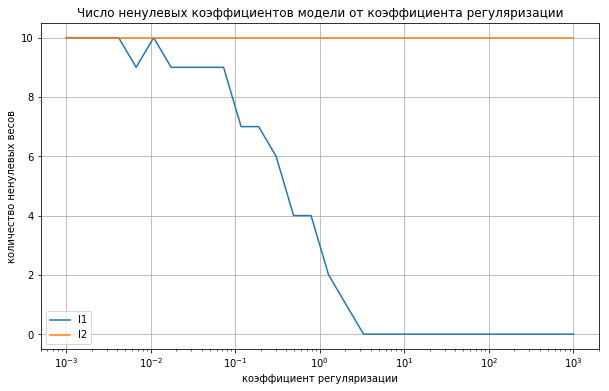

In [7]:
import matplotlib.pyplot as plt

cl = ['l1', 'l2']
fig, ax = plt.subplots(figsize=(10, 6), ncols = 1)
ax.plot(numpy.logspace(-3, 3, num = num), w_l1, numpy.logspace(-3, 3, num = num),w_l2)

ax.set_xscale('log')

ax.set_xlabel('коэффициент регуляризации')
ax.set_ylabel('количество ненулевых весов')

ax.set_title("Число ненулевых коэффициентов модели от коэффициента регуляризации")
ax.legend(cl)
ax.grid()

**Ответ:** График показывает, что в Lasso регрессии веса зануляются более жестко, чем в Ridge. Это объясняется тем, что на каждой итерации градиентного спуска при обновлении вектора весов в lasso происходит изменение на величину $ C *sign{(w_i)}$, значит веса постоянно приближаются к 0, а в ridge - на $ 2C *w_i$, то есть веса могут стремиться к 0, но не достигать его. С увеличением коэффициента регуляризации число нулевых весов Lasso увеличивается из-за роста штрафа на веса в оптимизационной задаче: коэффициенты весов должны сильнее прижиматься к 0.

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [10]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = linear_model.Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print((mean_squared_error(y_test, pred))**0.5, "rmse")
print(mean_absolute_error(y_test, pred), "mae")
print(r2_score(y_test, pred), "r2")

58.304415127748044 rmse
49.602846072753 mae
0.3598993868368464 r2


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

In [11]:
from sklearn.model_selection import GridSearchCV, KFold

In [12]:
from sklearn.metrics import fbeta_score, make_scorer
def my_custom_loss_func(y_true, y_pred):
    return (mean_squared_error(y_true, y_pred))**0.5

score = make_scorer(my_custom_loss_func, greater_is_better=False)

In [18]:
for sc in ['r2', 'neg_mean_absolute_error', score]:
    kf = KFold(n_splits=5)
    cv = kf.split(X_train)
    coef = np.logspace(-3, 3, num)
    param = {'alpha':coef}
    search = GridSearchCV(linear_model.Ridge(), param, cv  = cv, scoring = sc)
    search.fit(X_train, y_train)
    if sc != 'r2' and sc != 'neg_mean_absolute_error':
        sc = 'rmse'
    print('coef = ', search.best_params_['alpha'], "Ridge "+ sc)
    c = search.best_params_['alpha']

coef =  0.002592943797404667 Ridge r2
coef =  0.001 Ridge neg_mean_absolute_error
coef =  0.002592943797404667 Ridge rmse


In [19]:
model = linear_model.Ridge(alpha = c)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(mean_squared_error(y_test, pred) ** 0.5, "rmse")
print(r2_score(y_test, pred), "r2")

55.80657825796663 rmse
0.4135700442285267 r2


In [21]:
model = linear_model.Ridge(alpha = 0.001)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(mean_absolute_error(y_test, pred), "mae")

47.15555064391418 mae


**Ответ:** При оптимальных подобранных параметров качество модели по всем метрикам незначительно улучшилось: ошибки rmse, mae уменьшились на 3, 2 соответственно, метрика r2 увеличилась на 0.05.

In [36]:
from sklearn.metrics import log_loss

loss_mae = []
loss_rmse = []
func_r2 = []
num = 20
labels = np.unique(hstack((y_test, y_train)))
lab = np.unique(y_train)


for c in  numpy.logspace(-3, 3, num = num):
    model = linear_model.Ridge(alpha = c)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    loss_mae.append(mean_absolute_error(y_test, pred))
    loss_rmse.append(mean_squared_error(y_test, pred)**0.5)
    func_r2.append(r2_score(y_test, pred))

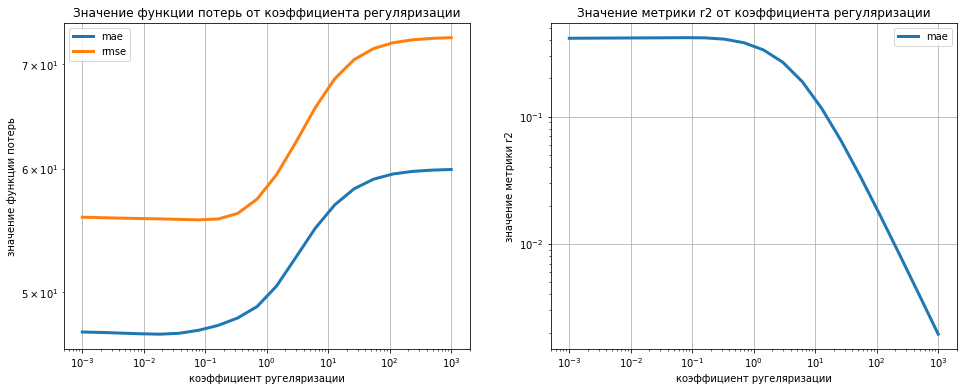

In [40]:
cl = ['mae', 'rmse']
fig, ax = plt.subplots(figsize=(16, 6), ncols = 2)
ax[0].plot(numpy.logspace(-3, 3, num = num), loss_mae, lw = '3')
ax[0].plot(numpy.logspace(-3, 3, num = num), loss_rmse, lw = '3')
ax[1].plot(numpy.logspace(-3, 3, num = num), func_r2, lw = '3')

ax[1].set_xscale('log')
ax[1].set_yscale('log')

ax[1].set_xlabel('коэффициент ругеляризации')
ax[1].set_ylabel('значение метрики r2')

ax[1].set_title("Значение метрики r2 от коэффициента регуляризации")
ax[1].legend(cl)
ax[1].grid()

ax[0].set_xscale('log')
ax[0].set_yscale('log')

ax[0].set_xlabel('коэффициент ругеляризации')
ax[0].set_ylabel('значение функции потерь')

ax[0].set_title("Значение функции потерь от коэффициента регуляризации")
ax[0].legend(cl)
ax[0].grid()

__Задание 2.__ Поиск объектов-выбросов

**(0.5 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

In [ ]:
from sklearn.model_selection import cross_val_predict
kf = KFold(n_splits=5)
cv = kf.split(X_train)
pred = cross_val_predict(linear_model.Ridge(), X_train, y_train, cv=cv, method = 'predict')


In [42]:
print(mean_squared_error(y_train, pred)** 0.5, "rmse")
print(mean_absolute_error(y_train, pred), "mae")
print(r2_score(y_train, pred), "r2")

60.03080530778428 rmse
50.08840179838473 mae
0.4184164390677788 r2


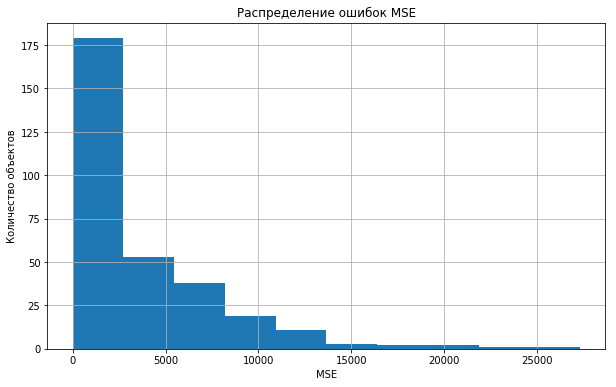

In [43]:
mse = (pred - y_train)**2
fig, ax = plt.subplots(figsize=(10, 6), ncols = 1)
ax.hist(mse)
ax.set_title("Распределение ошибок MSE")
ax.set_xlabel('MSE')
ax.set_ylabel('Количество объектов')
ax.grid()

**Ответ:** Распределение показывает, что на большей части объектов mse несильно отклоняется от ошибки rmse модели, то есть данные корректны. Существует незначительно количество объектов-выбросов с большим mse $> 10000$.

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [44]:
X_tr = X_train[mse < 10000]
y_tr = y_train[mse < 10000]

In [45]:
y_tr.shape

(283,)

In [46]:
kf = KFold(n_splits=5)
cv = kf.split(X_tr)
pred = cross_val_predict(linear_model.Ridge(), X_tr, y_tr, cv=cv, method = 'predict')


In [47]:
print(mean_squared_error(y_tr, pred)** 0.5, "rmse")
print(mean_absolute_error(y_tr, pred), "mae")
print(r2_score(y_tr, pred), "r2")

52.419673534640836 rmse
44.53087289434206 mae
0.4691573961477109 r2


In [48]:
model = linear_model.Ridge()
model.fit(X_tr, y_tr)
pred = model.predict(X_test)


In [49]:
print(mean_squared_error(y_test, pred)** 0.5, "rmse")
print(mean_absolute_error(y_test, pred), "mae")
print(r2_score(y_test, pred), "r2")

59.84077634410696 rmse
50.70017600708127 mae
0.3257207495894735 r2


**Ответ:** Точность предсказания модели на кросс-валидации заметно улучшилась после удаления объектов-выбросов, на которых возникает большая ошибка. Однако при применении алгоритма, обученного на новой обучающей выборке, к тестовой - качество ухудшилось (rmse, mae увеличились на 1, r2 уменьшилась на 0.04) . Это может быть вызвано тем, что в самой тестовой выборке остались выбросы.

## Часть 2. Метод опорных векторов и калибровка вероятностней

Сгенерируем синтетические данные.

In [50]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [51]:
from sklearn.svm import LinearSVR, SVC
model = LinearSVR()
model.fit(X_train, y_train)
pred = model.predict(X_test)

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score (y_test ,  pred)

0.8999837714514043

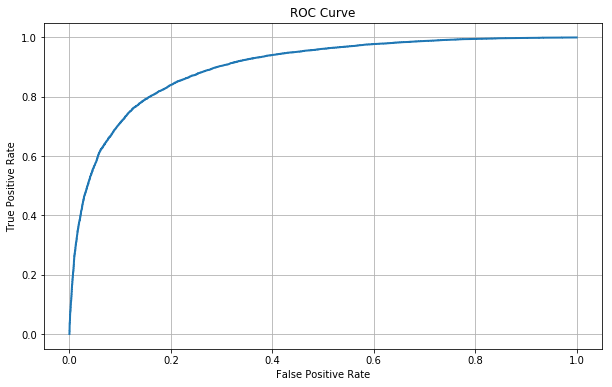

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

cl = ['l1', 'l2']
fig, ax = plt.subplots(figsize=(10, 6), ncols = 1)
ax.plot(fpr, tpr, lw = '2')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

ax.set_title("ROC Curve")
ax.grid()

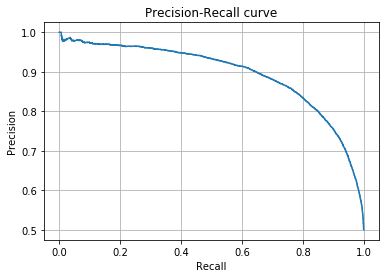

In [54]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, pred)

plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.title('Precision-Recall curve')
plt.grid()

In [55]:
auc(recall, precision)

0.8959379635746241

В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками, обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

Графики должны быть оформлены правильно, в соответствии с теми требованиями, которые были в первой лабороторной. Так же опорные вектора следует рисовать не другим цветом, а другой меткой (например, крестик), иначе теряется принадлежность к классу. 

In [35]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 1000, n_features=2, n_informative=2, n_redundant=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=241)

C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [36]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
sup_vec = model.support_vectors_

In [38]:
sup_vec_0 = []
sup_vec_1 = []

In [39]:
for vec in sup_vec:
    if y_train[(X_train[:, 0] == vec[0]) &(X_train[:, 1] == vec[1])][0] == 0:
        sup_vec_0.append(vec)
    else:
        sup_vec_1.append(vec)

In [40]:
sup_vec_0 = np.array(sup_vec_0)
sup_vec_1 = np.array(sup_vec_1)

In [41]:
cl_0 = X_train[y_train == 0]
cl_1 = X_train[y_train == 1]

In [42]:
x = range(-4,4)
coef = model.coef_[0]

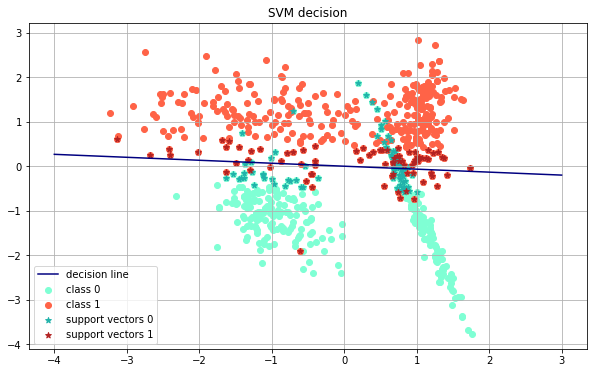

In [43]:
fig, ax = plt.subplots(figsize=(10, 6), ncols = 1)
ax.scatter(cl_0[:, 0], cl_0[:, 1], marker = 'o', c = 'aquamarine')
ax.scatter(cl_1[:, 0], cl_1[:, 1], marker = 'o', c = 'tomato')

ax.scatter(sup_vec_0[:, 0], sup_vec_0[:, 1], marker = '*', c = 'lightseagreen')
ax.scatter(sup_vec_1[:, 0], sup_vec_1[:, 1], marker = '*', c = 'firebrick')


ax.plot(x, -coef[0]*x/coef[1], color='navy')

ax.legend(['decision line', 'class 0', 'class 1', 'support vectors 0', 'support vectors 1'])
ax.set_title("SVM decision")
ax.grid()

__Задание 2.__ Калибровка вероятностей.

__(1.5 балла)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [52]:
def plot_calibration_curve(y_test, preds, leg):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        #bin_middle_points.append((l - r) / 2)

        bin_middle_points.append((l + r) / 2)
        #bin_real_ratios.append(np.min(y_test[(preds >= l) & (preds < r)] == 1))
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1))

    plt.plot(bin_middle_points, bin_real_ratios)
    plt.legend(leg)
    plt.grid()

Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.

In [190]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=40000, n_features=2, n_informative=2, n_redundant=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=241)

C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [191]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from scipy.special import expit


model = SVC(kernel='linear', probability = True)
model.fit(X_train, y_train)
svc_proba = model.predict_proba(X_test)



In [192]:
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
log_proba = model.predict_proba(X_test)

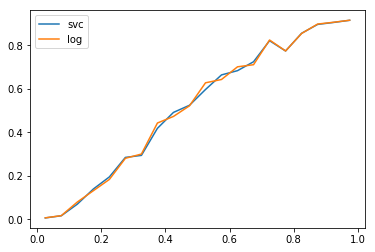

In [193]:
plot_calibration_curve(y_test, svc_proba[:, 1], ['svc'])
plot_calibration_curve(y_test, log_proba[:, 1], ['svc','log'])

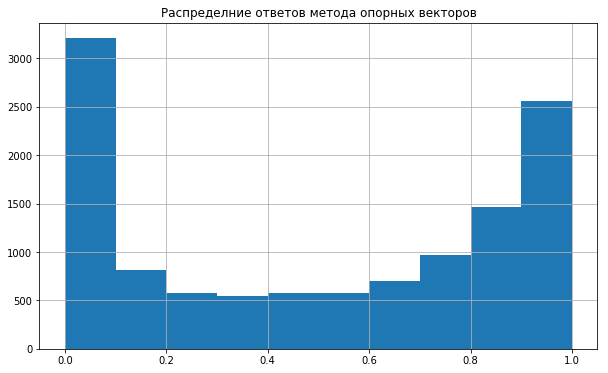

In [194]:
cl = ['class 0', 'class 1']
fig, ax = plt.subplots(figsize=(10, 6), ncols = 1)
ax.hist(svc_proba[:, 1])
ax.set_title("Распределние ответов метода опорных векторов")
ax.grid()

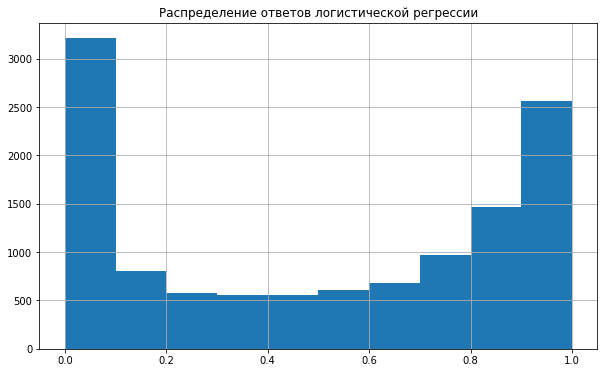

In [195]:
cl = ['class 0', 'class 1']
fig, ax = plt.subplots(figsize=(10, 6), ncols = 1)
ax.hist(log_proba[:, 1])
ax.set_title("Распределение ответов логистической регрессии")
ax.grid()

**Ответ:** Вид калибровочных кривых и распределений ответов совпадает для логистической регрессии и метода опорных векторов.

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

In [196]:
from sklearn.calibration import CalibratedClassifierCV

In [197]:
model = CalibratedClassifierCV()
model.fit(X_train, y_train)
cal_proba = model.predict_proba(X_test)

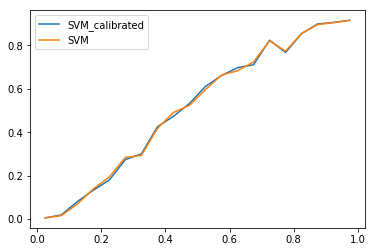

In [198]:
plot_calibration_curve(y_test, cal_proba[:, 1], ['SVM_calibrated'])
plot_calibration_curve(y_test, svc_proba[:, 1], ['SVM_calibrated', 'SVM'])

**Ответ:** Калибровочная кривая почти не изменилась, так как полученные изначально результаты для SVM уже представляют собой вероятности.

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

**Ответ:** Для калибровки вероятностей можно использовать следующее представление для вероятности положительного класса: $$P( y = 1 |x) = \frac{1}{1 +e^{A f(x)+B}}$$. 

In [199]:
def my_calibrate(proba, A,B):
    return expit(A*proba + B)

In [200]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from scipy.special import expit


model = SVC(kernel='linear')
model.fit(X_train, y_train)
svc_proba_my = model.decision_function(X_test)

svc_proba_my = my_calibrate(svc_proba_my, +1, 0)

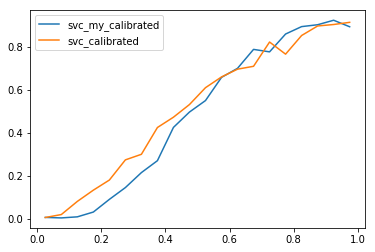

In [201]:
plot_calibration_curve(y_test, svc_proba_my, ['svc_my_calibrated'])
plot_calibration_curve(y_test, cal_proba[:, 1], ['svc_my_calibrated', 'svc_calibrated'])

**Ответ:** График изображает калибровочные кривые после калибровки вероятностей описанным способом при $A = -1, B = 0$  и встроенным методом калибровки. Можно заметить, что качество собственной реализации и метода из Sklearn примерно одинаково.

## Часть 3. Логистическая регрессия.

__Задание 3.__ Обучение логистической регрессии на реальных данных и оценка качества классификации.

**(0.5 балл)**

__Подготовка данных.__

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [738]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [739]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

In [385]:
kf = KFold(n_splits=3)
cv = kf.split(X_train)
coef = np.logspace(-3, 3, 20)
param = {'C':coef}
search = GridSearchCV(linear_model.LogisticRegression(), param, cv  = cv)
search.fit(X_train, y_train)
print('coef = ', search.best_params_['C'])
c = search.best_params_['C']

coef =  0.018329807108324356


In [386]:
from sklearn.svm import LinearSVC
model = linear_model.LogisticRegression(C = c, max_iter = 6000)
model.fit(X_train, y_train)
pred = model.predict(X_test)

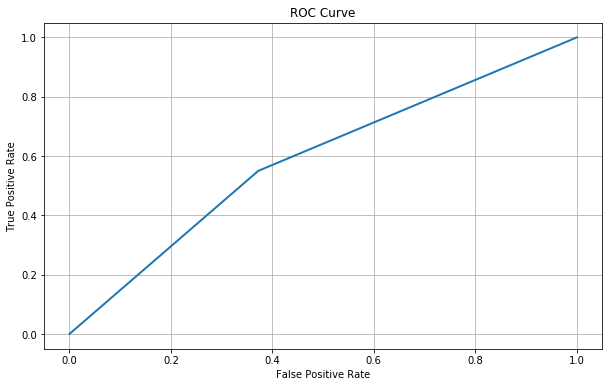

In [387]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

cl = ['l1', 'l2']
fig, ax = plt.subplots(figsize=(10, 6), ncols = 1)
ax.plot(fpr, tpr, lw = '2')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

ax.set_title("ROC Curve")
ax.grid()

In [388]:
roc_auc_score (y_test ,  pred)

0.5889246548805149

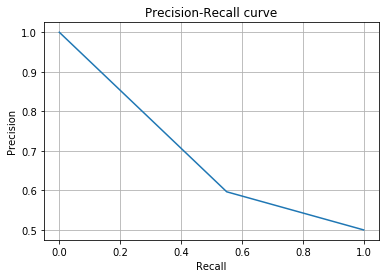

In [389]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, pred)

plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.title('Precision-Recall curve')
plt.grid()

Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

**Ответ:** Обе кривые имеют почти вид диагональный вид, то есть предсказания классификатора близки по качеству к случайному выбору класса - низкая точность модели.

__Задание 4.__ Изучение влияния регуляризатора на процесс обучения

__(1 балл)__

Проверьте на практике, как влияет регуляризатор на процесс обучения (убывание функции потерь на обучающей и отложенной выборках). Чтобы считать функцию потерь на отложенной выборке после каждой итерации, можно воспользоваться параметром `warm_start` у `sklearn.linear_model.LogisticRegression` либо методом `partial_fit` `sklearn.linear_model.SGDClassifier` (параметр `loss` тогда должен быть равен `log`).

In [390]:
from sklearn.linear_model import SGDClassifier

In [423]:
cl = np.unique(y_train)

In [394]:
loss = [[], [], []]

In [ ]:
model = SGDClassifier(alpha = 1e-3,loss = 'log', warm_start = True, random_state = 10)

for i in range(1000):
    model.partial_fit(X_train, y_train, classes =cl)
    pred = model.decision_function(X_test)
    pred = expit(pred)
    loss[0].append(log_loss(y_test, pred))

In [ ]:
model = SGDClassifier(alpha = 1e-2,loss = 'log', warm_start = True, random_state = 10)

for i in range(1000):
    model.partial_fit(X_train, y_train, classes =cl)
    pred = model.decision_function(X_test)
    pred = expit(pred)
    loss[1].append(log_loss(y_test, pred))

In [ ]:
cl = np.unique(y_train)
loss[2] = []
model = SGDClassifier(alpha = 1e-1/2,loss = 'log', warm_start = True, random_state = 10)

for i in range(100):
    model.partial_fit(X_train, y_train, classes =cl)
    pred = model.decision_function(X_test)
    pred = expit(pred)
    loss[2].append(log_loss(y_test, pred))

In [408]:
ls = []

In [ ]:
model = SGDClassifier(loss = 'log', warm_start = True, random_state = 10)

for i in range(1000):
    model.partial_fit(X_train, y_train, classes =cl)
    pred = model.decision_function(X_test)
    pred = expit(pred)

    ls.append(log_loss(y_test, pred))

In [ ]:
cl = np.unique(y_train)

model = SGDClassifier(alpha = 0.18, loss = 'log', warm_start = True, random_state = 10)

for i in range(100):
    model.partial_fit(X_train, y_train, classes =cl)
    pred = model.decision_function(X_test)
    pred = expit(pred)
    lloss[0].append(log_loss(y_test, pred))

In [ ]:
cl = np.unique(y_train)
model = SGDClassifier(alpha = 1, loss = 'log', warm_start = True, random_state = 10)

for i in range(100):
    model.partial_fit(X_train, y_train, classes =cl)
    pred = model.decision_function(X_test)
    pred = expit(pred)
    lloss[1].append(log_loss(y_test, pred))

In [ ]:
cl = np.unique(y_train)
model = SGDClassifier(alpha = 0.7, loss = 'log', warm_start = True, random_state = 10)

for i in range(100):
    model.partial_fit(X_train, y_train, classes =cl)
    pred = model.decision_function(X_test)
    pred = expit(pred)
    lloss[2].append(log_loss(y_test, pred))

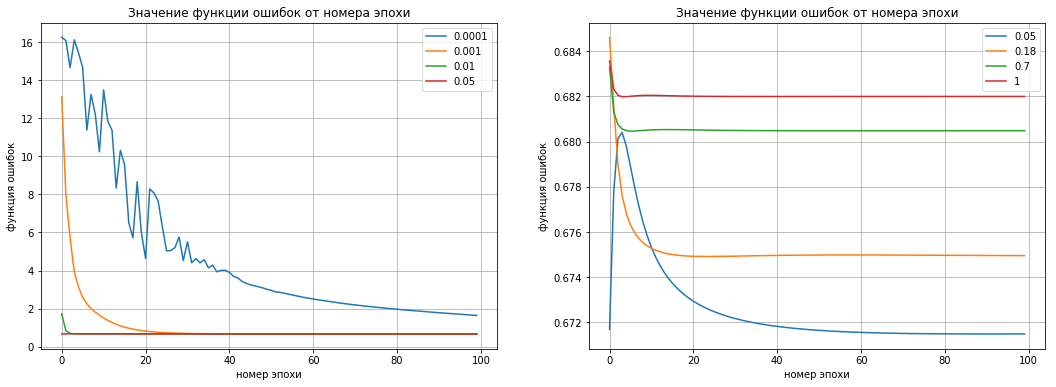

In [446]:
import matplotlib.pyplot as plt
cl = [1e-4, 1e-3, 1e-2, 1e-1/2, 0.18, 0.7, 1]
sz = 100
fig, ax = plt.subplots(figsize=(18, 6), ncols = 2)
ax[0].plot(np.arange(sz), ls[:sz], np.arange(sz), loss[0][:sz], np.arange(sz), loss[1][:sz],  np.arange(sz), loss[2][:sz])

ax[0].set_xlabel('номер эпохи')
ax[0].set_ylabel('функция ошибок')

ax[0].set_title("Значение функции ошибок от номера эпохи")
ax[0].legend(cl)
ax[0].grid()

ax[1].plot(np.arange(sz), loss[2][:sz], np.arange(sz), lloss[0][:sz], np.arange(sz), lloss[2][:sz], np.arange(sz), lloss[1][:sz])

ax[1].set_xlabel('номер эпохи')
ax[1].set_ylabel('функция ошибок')

ax[1].set_title("Значение функции ошибок от номера эпохи")
ax[1].legend(cl[3:])
ax[1].grid()

**Ответ:** Результаты показывают, при увеличении значения коэффициента регуляризации $C > 0.05$ фукнция потерь сходится к большему значению, но сходимость наступает быстрее. При малом  $C = 0.0001$ наблюдаются сильные колебания - неустойчивость алгоритма, однако далее функция тоже сходится. Подбор оптимального значения  $C = 0.018$ можно объяснить тем, что при нем значение функции ошибок мало, а сходимость наступает быстро.

## Часть 4. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Задание 5.__ Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

__(0 баллов)__

In [ ]:
#из предыдущего задания 0.5889246548805149
roc_auc_score (y_test ,  pred)

__Задание 6.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(0.5 балла)__

In [740]:
cat = []
other = []

for col in X_train:
    if(col[-3:] == 'cat'):
        cat.append(col)
    else:
        other.append(col)

X_train_cat = X_train[cat]
X_train_other = X_train[other]
X_test_cat = X_test[cat]
X_test_other = X_test[other]

from time import time
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X_train_cat_hot = enc.fit_transform(X_train_cat+1).toarray()
X_test_cat_hot = enc.transform(X_test_cat+1).toarray()

X_train = np.hstack((X_train_cat_hot, X_train_other))
X_test = np.hstack((X_test_cat_hot, X_test_other))

In [741]:
X_train.shape

(100000, 226)

In [742]:
import time

In [743]:
model = linear_model.LogisticRegression()
start = time.time()
model.fit(X_train, y_train)
end = time.time()
pred = model.predict_proba(X_test)
print(str(end-start) + ', c')

17.4244487285614, c


In [744]:
roc_auc_score (y_test ,  pred[:, 1])

0.6329291095141791

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки. 

__(Бонусная часть)__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы. Не забудьте замерить время.

__(+0.5 балл)__

In [503]:
data.shape

(200000, 57)

In [489]:
X_cat = np.vstack((X_train_cat, X_test_cat))

y = np.hstack((y_train, y_test))


In [491]:
import random

def cnt(X, y):
    ans = np.zeros((X.shape[0], X.shape[1]))
    #noise  = np.random.normal(loc=0.0, scale=1e-2, size=(X.shape[0], X.shape[1]))

    for j in range(0, X.shape[1]):
        print(j)
        for i in range (0, X.shape[0]):
            x = X[i, j]
            num = np.sum((X[:, j] == x) & (y == 1))
            den = np.sum((X[:, j] == x))
            ans[i, j] = float(num) / den
    return ans

X_cat_new = cnt(X_cat, y)

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [727]:
noise  = np.random.normal(loc=0.0, scale=1e-3, size=(X_cat_new.shape[0], X_cat_new.shape[1]))

X_cat_new_noise = np.copy(X_cat_new)+noise

In [728]:
X_train_cat_new = X_cat_new_noise[:100000]
X_test_cat_new = X_cat_new_noise[100000:]

In [729]:
X_train_cat_new.shape

(100000, 14)

In [745]:
X_train = np.hstack((X_train_cat_new, X_train_other))
X_test = np.hstack((X_test_cat_new, X_test_other))

In [731]:
y_train = y[:100000]
y_test = y[100000:]

In [733]:
model = linear_model.LogisticRegression()
start = time.time()
model.fit(X_train, y_train)
end = time.time()
pred = model.predict_proba(X_test)
print(str(end-start) + ', c')

12.34100079536438, c


In [734]:
roc_auc_score (y_test ,  pred[:, 1])

0.6296038354662952

__(Бонусная часть)__ Посчитайте корректные счётчики, основываясь на объектах расположеных выше в датасете (не забудьте добавить и шум). 

__(+0.5 балла)__

In [510]:
import random

def cnt_correct(X, y):
    ans = np.zeros((X.shape[0], X.shape[1]))
    #noise  = np.random.normal(loc=0.0, scale=1e-2, size=(X.shape[0], X.shape[1]))

    for j in range(0, X.shape[1]):
        print(j)
        for i in range(0, X.shape[0]):
            x = X[i, j]
            num = np.sum((X[:i+1, j] == x) & (y[:i+1] == 1))
            den = np.sum((X[:i+1, j] == x))
            ans[i, j] = float(num) / den
    return ans

X_cat_correct = (cnt_correct(X_cat, y))

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [716]:
noise  = np.random.normal(loc=0.0, scale=1e-3, size=(X_cat_correct.shape[0], X_cat_correct.shape[1]))

data_tmp = np.copy(X_cat_correct)+noise

X_train_cat_correct = data_tmp[:100000]
X_test_cat_correct = data_tmp[100000:]

In [717]:
X_train = np.hstack((X_train_cat_correct, X_train_other))
X_test = np.hstack((X_test_cat_correct, X_test_other))

In [721]:
import time
model = linear_model.LogisticRegression()
start = time.time()
model.fit(X_train, y_train)
end = time.time()
pred = model.predict_proba(X_test)
print(str(end-start) + ', c')

13.310407876968384, c


In [722]:
roc_auc_score (y_test ,  pred[:, 1])

0.6294242814637097

**Ответ: ** При использовании счетчиков для кодирования категориальных признаков показатель roc-auc ухудшился на 0.003. Это могло произойти из-за того, что  one-hot-encoding лишь изменяет способ хранения исходных значения признаков, а счетчики заменяют их приближенные значения. Кроме того, шум мог оказать отрицательное влияние. При применении корректных счетчиков, посчитанных по объектам выше в датасете, величина roc-auc снизилась еще на 0.0002.

Размерность преобразованного пространства признаков уменьшилась на $226-57=169$, это привело к сокращению времени для обучения модели на 5с по сравнению с OneHotEncoding.

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? 

Ответ: Из-за малого количества объектов нельзя корректно оценить влияние категории на целевую переменную, поэтому дополнительно проводится усреднение по всем категориям.

По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 7.__ Реализуйте счетчики со сглаживанием, как описано выше. Обучите логистическую регрессию, оцените качество.

__(0.5 балл)__

In [538]:
import random

def cnt_mean(X, y,c):
    ans = np.zeros((X.shape[0], X.shape[1]))
    #noise  = np.random.normal(loc=0.0, scale=1e-2, size=(X.shape[0], X.shape[1]))
    global_mean  = y.mean()

    for j in range(0, X.shape[1]):
        print(j)
        for i in range (0, X.shape[0]):
            x = X[i, j]
            num = np.sum((X[:, j] == x) & (y == 1)) + c * global_mean
            den = np.sum((X[:, j] == x)) + c
            ans[i, j] = float(num) / den
    return ans

X_cat_mean = (cnt_mean(X_cat, y, 10))

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [723]:
X_train_cat_mean.shape

(100000, 14)

In [724]:
noise  = np.random.normal(loc=0.0, scale=1e-5, size=(X_cat_correct.shape[0], X_cat_correct.shape[1]))

data_tmp = np.copy(X_cat_mean)+noise

X_train_cat_mean = data_tmp[:100000]
X_test_cat_mean = data_tmp[100000:]
X_train = np.hstack((X_train_cat_mean, X_train_other))
X_test = np.hstack((X_test_cat_mean, X_test_other))

In [725]:
model = linear_model.LogisticRegression()
start = time.time()
model.fit(X_train, y_train)
end = time.time()
pred = model.predict_proba(X_test)
print(str(end-start) + ', c')

12.496623992919922, c


In [726]:
roc_auc_score (y_test ,  pred[:, 1])

0.6295878926660656

__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

**Ответ:**
Плюсы OneHotEncoding: более высокая точность, чем для счетчиков; нет переобучения, так как при кодировании не используется целевая переменная

Минусы OneHotEncoding: сильный рост размерности признакового пространства и, как следствие, увеличение времени, необходимого для обучения и предсказания модели.

## Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [227]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [228]:
cat = []
other = []

for col in X_train:
    if(col[-3:] == 'cat'):
        cat.append(col)
    else:
        other.append(col)

X_train_cat = X_train[cat]
X_train_other = X_train[other]
X_test_cat = X_test[cat]
X_test_other = X_test[other]

from time import time
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X_train_cat_hot = enc.fit_transform(X_train_cat+1).toarray()
X_test_cat_hot = enc.transform(X_test_cat+1).toarray()

X_train = np.hstack((X_train_cat_hot, X_train_other))
X_test = np.hstack((X_test_cat_hot, X_test_other))

In [208]:
X_train.shape

(476169, 227)

**Ответ:** 227 признаков.

В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [210]:
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict_proba(X_test)

In [211]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score (y_test ,  pred[:, 1])

0.6380749522140562

### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8.__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков.

Изменилось ли качество? Как?

__(0.5 балла)__

In [212]:
import time

In [213]:
start = time.time()
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
weight = model.coef_[0]
args = np.argsort(abs(weight))[::-1][:200]
end = time.time()
end-start

24.260249614715576

In [214]:
model = linear_model.LogisticRegression()
model.fit(X_train[:, args], y_train)
pred = model.predict_proba(X_test[:, args])
roc_auc_score (y_test ,  pred[:, 1])

0.6383429778574515

**Ответ:** метрика roc-auc повысилась на 0.0003. Время отбора - 24с.

А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки. 

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [222]:
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [223]:
import time
start = time.time()
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
weight = model.coef_[0]
args = np.argsort(abs(weight))[::-1][:200]
end = time.time()
end-start

20.728378772735596

In [224]:
model = linear_model.LogisticRegression()
model.fit(X_train[:, args], y_train)
pred = model.predict_proba(X_test[:, args])
roc_auc_score (y_test ,  pred[:, 1])

0.6381690992875844

**Ответ:** качество улучшилось относительно качества до отбора признаков, однако после масштабирования метрика roc-auc уменьшилась  на 0.0001. Время отбора - 21 с.

### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $mu$, $sigma$, $n$ соответственно среднее, среднеквадратичное отклонение и количество объектов каждого из классов.

__Задание 9.__ Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков в этом случаев.

__(0.5 балла)__

In [677]:
def stat(X, y):
    ans = []
    for j in range(X.shape[1]):
        pos = X[:, j]
        pos = pos[y == 1].reshape(-1, )
        neg = X[:, j]
        neg = neg[y == 0].reshape(-1, )
        num = abs(np.mean(pos) - np.mean(neg))
        den = sqrt((pos.shape[0] * (np.std(pos) ** 2) + neg.shape[0] * (np.std(neg) ** 2)) / (neg.shape[0] + pos.shape[0]))
        ans.append(num / den)
    return ans

In [678]:
start = time.time()
ans = stat(X_train, y_train)
idx = np.argsort(ans)[::-1][:200]
end = time.time()
end - start

3.9690277576446533

In [679]:
model = linear_model.LogisticRegression()
model.fit(X_train[:, idx], y_train)
pred = model.predict_proba(X_test[:, idx])
roc_auc_score (y_test ,  pred[:,1])

0.6385155855326041

**Ответ:** метрика roc-auc повысилась на 0.0005. Время отбора - 4с.

### Методы-обёртки

__Задание 10.__ 

__(1 балл)__

Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо. 

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [698]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X_train, y_train, test_size=0.4, random_state=124)

In [681]:
X_tr.shape

(285701, 227)

In [700]:
from random import shuffle
import time

In [703]:
cnt = 227
start = time.time()
while(cnt > 200):

    numbers = list(range(cnt))
    shuffle(numbers)
    tmp = numbers[:3]
    fold = numbers[3:]    
    
    model = linear_model.LogisticRegression(C = c)
    
    numbers = list(range(X_tr.shape[0]))
    shuffle(numbers)
    idx = numbers[:100000]
    
        
    X = X_tr[idx]
    X = X[:, fold]
    
    model.fit(X, y_tr[idx])
    
    numbers = list(range(X_ts.shape[0]))
    shuffle(numbers)
    idx = numbers[:100000] 
    
    
    X = X_ts[idx]
    X = X[:, fold]
    pred = model.predict_proba(X)
    
    score = roc_auc_score(y_ts[idx], pred[:, 1])
    print(score)
    
    if score <= 0.62:
        X_tr = X_tr[:, fold]
        X_ts = X_ts[:, fold]
        X_test = X_test[:, fold]
        X_train = X_train[:, fold]
        cnt -= 3 
end = time.time()
print(end - start)

0.6263039852579375
0.6142721107005779
0.6182151023202673
0.6181707528418158
0.6186798596783575
0.6234292153760064
0.6161526378611516
0.619242566114722
0.6231724182964773
0.6103699575166391
0.6216293547809806
0.6173919114445099
0.6184528147583556
73.39654684066772


In [706]:
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict_proba(X_test)
roc_auc_score (y_test ,  pred[:,1])

0.6375153611329435

In [230]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import time
lr = LogisticRegression()
#select 5 the most informative features
rfe = RFE(lr, 200) 
start = time.time()
selector = rfe.fit(X_train,y_train)
end = time.time()

In [233]:
end-start

827.2384502887726

In [234]:
model = linear_model.LogisticRegression()
model.fit(X_train[:,selector.support_], y_train)
pred = model.predict_proba(X_test[:,selector.support_])
roc_auc_score (y_test ,  pred[:,1])

0.638129743914594

**Ответ:** при применении собственной реализации метрика roc-auc понизилась на 0.0005. Время отбора - 73с. При применении реализации с Sklearn roc-auc повысилась на 0.0001. Время отбора - 827с

Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**Ответ:** Оптимальным методом является метод фильтрации: он дает максимальную точность и минимальное время для отбора признаков. Высокая скорость работы достигается благодаря возможности векторизованных вычислений. Недостатком метода явлется то, что в нем каждый признак рассматривается отдельно, но из-за корреляции признаков итоговое качество модели может не оказаться наилучшим на выбранном таким образом подмножестве.

Встроенные методы также дают повышение качества работы, однако требуют большего времени для отбора признаков, так как он происходит в результате обучения модели, а не простых вычислений, как при фильтрации.

Методы-обертки позволяют выбрать лучшее подмножество признаков из всевозможных с помощью проверки качества при обучении на них, то есть признаки рассматриваются уже не сами по себе, а в совокупности, что позволяет повысить качество модели. Недостатком таких алгоритмов явлется то, что требуют много времени для отбора признаков и дополнительной настройки параметров, например, порога точности, при котором признаки отбрасываются.

## Настройка порога для бинаризации вероятностей

В этой части мы будем проделывать стандартные операции для подготовки модели к её реальному использованию — подбора порога для бинаризации вероятностей с учётом потребностей бизнеса или продукта. Хороший алгоритм с точки зрения ROC-AUC это, конечно, хорошо, но ведь в реальности нам надо принимать решение бинарно, например, выдавать ли кредит человеку. 

Воспользуемся той же самый задачей, что и в предыдущем разделе — определение обращение клиента в страховую в ближайшее время. Положительные объекты в нашей выборки как раз обратившиеся в страховую клиенты. 

Не вдаваясь в подробности бизнеса страховых, можно понять, что обращение клиента по страховому случаю для нас как страховой невыгодно, ведь мы теряем на этом деньги. Клиенты, которые не обращаются в страховую и ездят аккуратно, приносят нам деньги.

Пусть на каждом клиенте, который обратился в нашу страховую, мы теряем 100000, а на клиенте, который не обратился в страховую, мы зарабатываем 5000. 

Будем строить алгоритм, который прогнозирует обращение по страховому случаю, чтобы некоторым потенциальным клиентам отказывать в обслуживании, если мы уверены, что на них мы потеряем деньги.

In [236]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

In [237]:
X_train.shape

(476169, 57)

В этот раз мы не будем сэмплировать данные и будем использовать их "как есть".

Посчитайте долю положительных примеров в выборке? Скажите, почему она такая?

In [238]:
np.mean(target)

0.036447517859182946

**Ответ:** Доля положительных ответов в выборке мала $(3.6\%)$ в силу особенностей задачи: число людей, которые обращаются по страховым случаем, гораздо меньше, чем тех, кто ездит аккуратно.

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить.

In [239]:
cat = []
other = []

for col in X_train:
    if(col[-3:] == 'cat'):
        cat.append(col)
    else:
        other.append(col)

X_train_cat = X_train[cat]
X_train_other = X_train[other]
X_test_cat = X_test[cat]
X_test_other = X_test[other]

from time import time
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X_train_cat_hot = enc.fit_transform(X_train_cat+1).toarray()
X_test_cat_hot = enc.transform(X_test_cat+1).toarray()

X_train = np.hstack((X_train_cat_hot, X_train_other))
X_test = np.hstack((X_test_cat_hot, X_test_other))

In [240]:
X_train_cat.shape

(476169, 14)

В качестве нашей основной модели будем использовать логистическую регрессию, которая возвращает вероятность положительного класса. Обучите модель, сделайте предсказания на тестовой выборке.

In [241]:
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict_proba(X_test)

Посчитайте ROC-AUC. Что вы можете про него сказать? Как вы считаете, почему получилось так?

In [242]:
roc_auc_score (y_test ,  pred[:,1])

0.6380749522140562

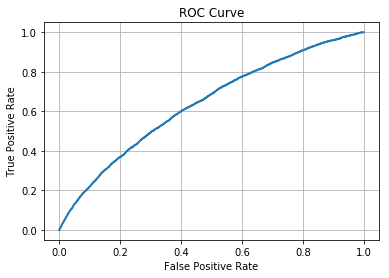

In [247]:
fpr, tpr, thresholds = roc_curve(y_test, pred[:,1])

cl = ['l1', 'l2']
fig, ax = plt.subplots(figsize=(6, 4), ncols = 1)
ax.plot(fpr, tpr, lw = '2')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

ax.set_title("ROC Curve")
ax.grid()

In [243]:
pred_1 = model.predict(X_test)

Постройте precision-recall кривую на тестовой выборке. Что вы можете по ней сказать?

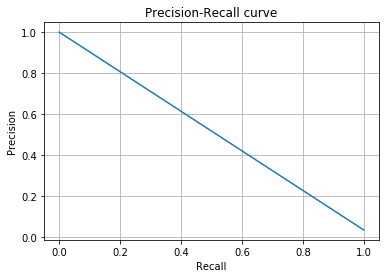

In [827]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, pred_1)

plt.plot(recall, precision)

plt.xlabel('Recall')a
plt.ylabel('Precision')

plt.title('Precision-Recall curve')
plt.grid()

**Ответ:** по показателям roc-auc и precision-recall можно сказать, что у модели низкое качество классификации, прогноз близок к случайному. Это может быть вызвано тем, что в выборке представлено слишком мало объектов истинно положительного класса. 

У нас есть алгоритм, который определяет вероятность обращения клиента по страховому случаю, но мы хотим использовать этот алгоритм, чтобы отказывать клиентам в обслуживании в страховой. Для этого нам нужны бинарные предсказания алгоритма. Давайте искать этот порог для получения бинарных предсказаний.

__Задание 11.__

__(0.5 балла)__

Предположим, что нам надо подобрать порог такой, чтобы среди наших положителных предсказаний 95\% действительно обратились бы по страховому случаю. Подберите соответствующий порог, оцените на нём precision, recall. Скажите, какой части потенциальных клиентов мы откажем?

In [909]:
for i in np.arange(0.01, 0.9, 0.0001):
    y = np.zeros(y_test.shape[0])
    for j , p in enumerate(pred):
        y[j] = int(p[1] > i)
    tpr = np.sum((y == y_test) & (y == 1)) / np.sum(y_test == 1)
    res = np.sum((y == 1) & (y_test == 0)) / np.sum(y_test == 0)
    
    if abs(tpr - 0.95) <1e-2:
        print(i)
        print(tpr)
        print(res)
        break

0.018999999999999947
0.959731543624161
0.9014487195132581


In [911]:
from sklearn.metrics import precision_score, recall_score

In [912]:
precision_score(y_test, y)

0.03855414966112883

In [913]:
recall_score(y_test, y)

0.959731543624161

**Ответ:** 
подобранный порог для бинаризации - 0.019,
precision = 0.038,
recall = 0.96. Откажем 90% потенциальных клиентов.

Иногда сложно решить, какие значения precision и recall нужны в нашей задаче. Однако иногда можно оценить экономический эффект от нашего алгоритма. Мы знаем, во сколько нам обходится клиент, который обратился в страховую, и сколько нам приносит клиент, который не обратился. 

При фиксированном пороге мы знаем, кому мы бы отказали в обслуживании. Среди них есть те, кто обратился бы в страховую и нам пришлось бы потратить деньги, и те, кто не обратился бы, то есть принёс бы нам деньги. Мы можем посчитать разницу между нашими доходами и расходами от этой группы людей и надеяться, что она будет положительной. 

__Задание 12.__ Найдите такой порог, при котором наш баланс (разница между доходами и расходами на группе клиентов, которым мы отказали) неотрицательный. 

__(1 балл)__

In [904]:
for i in np.arange(0.01, 0.9, 0.0001):
    
    y = np.zeros(y_test.shape[0])   
    for j , p in enumerate(pred):
        y[j] = int(p[1] > i)

    a = np.sum(((y == 0) & (y_test == 0)))*5000
    b = np.sum(((y == 0) & (y_test == 1)))*100000 + np.sum(((y == 1) & (y_test == 0)))*5000
    #расходами считаем то, что действительно потеряли и то, что могли бы заработать, но не заработали
    
    if (a- b) >0:
        print(i)
        print(a, b)
        print(a - b)
        break

0.03909999999999982
392885000 392625000
260000


**Ответ:** значение порога 0.039, наш баланс при этом 260000.

А на каком значение порога это разнциа максимальна? Скольким клиентам мы отказали в обслуживании?

In [905]:
mx = 0
for i in np.arange(0.04, 0.9, 0.001):
    y = np.zeros(y_test.shape[0])   
    for j , p in enumerate(pred):
        y[j] = int(p[1] > i)

    a = np.sum(((y == 0) & (y_test == 0)))*5000
    b = np.sum(((y == 0) & (y_test == 1)))*100000 + np.sum(((y == 1) & (y_test == 0)))*5000
       
    if (a- b) > mx:
        mx = a -b
        mx_i = i

In [906]:
mx_i

0.08500000000000005

In [907]:
mx

143930000

In [908]:
y = np.zeros(y_test.shape[0])   
for j , p in enumerate(pred):
        y[j] = int(p[1] > mx_i)
np.sum(np.sum(y == 1))

3080

In [250]:
3080 / y.shape[0]

0.077

**Ответ:** значение порога = 0.085, максимальный баланс = 143930000, при этом отказали 3080 клиентам.

## Часть 5 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

__Задание 13.__ Работа с vowpal wabbit. 

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте. 
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- достижение ROC-AUC на отложенной выборки более 0.738 __(1 балл)__
- несколько занимательных фактов и возможностей vowpal-wabbit __(0.5 балла)__.

In [1]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ